In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IMDB-Movie-Data.csv', index_col = 'Title')

In [3]:
df.head()

,Rank,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.shape

(1000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
Rank                  1000 non-null int64
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Duration              1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [6]:
df.rename(columns={'Revenue (Millions)': 'Revenue'}, inplace = True)

In [7]:
df.columns = [x.lower() for x in df.columns]

In [8]:
df.head()

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [9]:
(df['genre'].value_counts(normalize = 'True')*100).head()

Action,Adventure,Sci-Fi    5.0
Drama                      4.8
Comedy,Drama,Romance       3.5
Comedy                     3.2
Drama,Romance              3.1
Name: genre, dtype: float64

In [10]:
seperate_genre='Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Family','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western'

In [11]:
for genre in seperate_genre:
    df2 = df['genre'].str.contains(genre).fillna(False)
    print(' total number of movies with ',genre,'=',len(df[df2]))

 total number of movies with  Action = 303
 total number of movies with  Adventure = 259
 total number of movies with  Animation = 49
 total number of movies with  Biography = 81
 total number of movies with  Comedy = 279
 total number of movies with  Crime = 150
 total number of movies with  Drama = 513
 total number of movies with  Fantasy = 101
 total number of movies with  Family = 51
 total number of movies with  History = 29
 total number of movies with  Horror = 119
 total number of movies with  Music = 21
 total number of movies with  Musical = 5
 total number of movies with  Mystery = 106
 total number of movies with  Romance = 141
 total number of movies with  Sci-Fi = 120
 total number of movies with  Sport = 18
 total number of movies with  Thriller = 195
 total number of movies with  War = 13
 total number of movies with  Western = 7


# suppose if i want to print only that data whose having comedy movie

In [12]:
df[:][df.genre.str.contains('Comedy')]

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
Title,,,,,,,,,,,
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
Moana,14,"Animation,Adventure,Comedy","In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,248.75,81.0
Colossal,15,"Action,Comedy,Drama",Gloria is an out-of-work party girl forced to ...,Nacho Vigalondo,"Anne Hathaway, Jason Sudeikis, Austin Stowell,...",2016,109,6.4,8612,2.87,70.0
The Secret Life of Pets,16,"Animation,Adventure,Comedy",The quiet life of a terrier named Max is upend...,Chris Renaud,"Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",2016,87,6.6,120259,368.31,61.0
Trolls,24,"Animation,Adventure,Comedy","After the Bergens invade Troll Village, Poppy,...",Walt Dohrn,"Anna Kendrick, Justin Timberlake,Zooey Deschan...",2016,92,6.5,38552,153.69,56.0
Paris pieds nus,26,Comedy,Fiona visits Paris for the first time to assis...,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,6.8,222,NaN,NaN
Bad Moms,29,Comedy,When three overworked and under-appreciated mo...,Jon Lucas,"Mila Kunis, Kathryn Hahn, Kristen Bell,Christi...",2016,100,6.2,66540,113.08,60.0


In [13]:
df[:][df.director.str.contains('Guy Ritchie')]

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
Title,,,,,,,,,,,
The Man from U.N.C.L.E.,105,"Action,Adventure,Comedy","In the early 1960s, CIA agent Napoleon Solo an...",Guy Ritchie,"Henry Cavill, Armie Hammer, Alicia Vikander, E...",2015,116,7.3,202973,45.43,56.0
Sherlock Holmes,282,"Action,Adventure,Crime",Detective Sherlock Holmes and his stalwart par...,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",2009,128,7.6,501769,209.02,57.0
RocknRolla,323,"Action,Crime,Thriller","In London, a real-estate scam puts millions of...",Guy Ritchie,"Gerard Butler, Tom Wilkinson, Idris Elba, Than...",2008,114,7.3,203096,5.69,53.0
Sherlock Holmes: A Game of Shadows,466,"Action,Adventure,Crime",Sherlock Holmes and his sidekick Dr. Watson jo...,Guy Ritchie,"Robert Downey Jr., Jude Law, Jared Harris, Rac...",2011,129,7.5,357436,186.83,48.0


In [14]:
df.duration.mean()

113.172

In [15]:
df.rating.max()

9.0

In [16]:
df.duration.max()

191

In [17]:
df.revenue.max()

936.63

In [18]:
df[:][df.revenue >= 700]

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
Title,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,51,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
Avatar,88,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0


In [19]:
df.pivot_table(index = 'year') # pivot table use for only numeric value to of mean

,duration,metascore,rank,rating,revenue,votes
year,,,,,,
2006,120.840909,64.414634,588.500000,7.125000,86.296667,269289.954545
2007,121.622642,64.500000,576.584906,7.133962,87.882245,244331.037736
2008,110.826923,57.408163,625.634615,6.784615,99.082745,275505.384615
2009,116.117647,57.122449,586.823529,6.960784,112.601277,255780.647059
2010,111.133333,59.389831,587.316667,6.826667,105.081579,252782.316667
2011,114.603175,61.724138,589.571429,6.838095,87.612258,240790.301587
2012,119.109375,61.145161,532.875000,6.925000,107.973281,285226.093750
2013,116.065934,58.534884,556.230769,6.812088,87.121818,219049.648352
2014,114.489796,57.315789,512.979592,6.837755,85.078723,203930.224490


In [20]:
df23 = pd.read_csv('IMDB-Movie-Data.csv')

In [21]:
df23.head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


In [113]:
df23 = df23.rename(columns={'Revenue (Millions)': 'Revenue'})

In [116]:
df23.columns = [x.lower() for x in df23.columns] 

In [117]:
df23.head(1)

,rank,title,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


# calculating in single-2 year how many movies as maked

In [22]:
pd.crosstab(df23.Year, df23.Title, margins=True)

Title,(500) Days of Summer,10 Cloverfield Lane,10 Years,12 Years a Slave,127 Hours,13 Hours,1408,17 Again,2012,20th Century Women,...,Your Highness,Youth,Zack and Miri Make a Porno,Zero Dark Thirty,Zipper,Zodiac,Zombieland,Zoolander 2,Zootopia,All
Year,,,,,,,,,,,,,,,,,,,,,
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
2007,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,53
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,52
2009,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,51
2010,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60
2011,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,63
2012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,64
2013,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,91
2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,98


In [23]:
df23.Year.value_counts() # this is simple way to calculate the in single year how many movies are maked

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

In [24]:
df.actors.value_counts()

Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett                 2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                        2
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon                 2
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson         2
Jake Gyllenhaal, Michael Peña, Anna Kendrick, America Ferrera               1
Paul Sidhu, Branden Coles, Arielle Holmes, Kelcey Watson                    1
Joe Alwyn, Garrett Hedlund, Arturo Castro, Mason Lee                        1
Hilary Swank, Gerard Butler, Harry Connick Jr., Lisa Kudrow                 1
Tatiana Pauhofová, Karl Markovics, Gedeon Burkhard,Simona Stasová           1
George Clooney, Shailene Woodley, Amara Miller, Nick Krause                 1
Chris Isaak, Kiefer Sutherland, C.H. Evans, Sandra Kinder                   1
Ethan Hawke, Lena Headey, Max Burkholder,Adelaide Kane                      1
Adam Sandler, Andy Samberg, Selena Gomez, Kevin James           

# finding highest rating directior name with movie name

In [25]:
df[['director','rating']][df['rating'] >= 9]

,director,rating
Title,,
The Dark Knight,Christopher Nolan,9.0


In [26]:
df[['director', 'genre']][df.genre.str.contains('Action')]

,director,genre
Title,,
Guardians of the Galaxy,James Gunn,"Action,Adventure,Sci-Fi"
Suicide Squad,David Ayer,"Action,Adventure,Fantasy"
The Great Wall,Yimou Zhang,"Action,Adventure,Fantasy"
The Lost City of Z,James Gray,"Action,Adventure,Biography"
Rogue One,Gareth Edwards,"Action,Adventure,Sci-Fi"
Colossal,Nacho Vigalondo,"Action,Comedy,Drama"
Jason Bourne,Paul Greengrass,"Action,Thriller"
Independence Day: Resurgence,Roland Emmerich,"Action,Adventure,Sci-Fi"
Bahubali: The Beginning,S.S. Rajamouli,"Action,Adventure,Drama"


In [27]:
revenue = df['revenue']

In [28]:
revenue[:][revenue>100].head(10)

Title
Guardians of the Galaxy                    333.13
Prometheus                                 126.46
Split                                      138.12
Sing                                       270.32
Suicide Squad                              325.02
La La Land                                 151.06
Passengers                                 100.01
Fantastic Beasts and Where to Find Them    234.02
Hidden Figures                             169.27
Rogue One                                  532.17
Name: revenue, dtype: float64

In [29]:
df.revenue.describe()

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: revenue, dtype: float64

In [30]:
df.revenue.describe()

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: revenue, dtype: float64

In [31]:
df.describe(include =['object'])

,genre,description,director,actors
count,1000,1000,1000,1000
unique,207,1000,644,996
top,"Action,Adventure,Sci-Fi","When her father unexpectedly passes away, youn...",Ridley Scott,"Gerard Butler, Aaron Eckhart, Morgan Freeman,A..."
freq,50,1,8,2


In [32]:
subsets = df[['genre', 'rating']]

In [33]:
subsets.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


In [34]:
df.loc['Split']

rank                                                           3
genre                                            Horror,Thriller
description    Three girls are kidnapped by a man with a diag...
director                                      M. Night Shyamalan
actors         James McAvoy, Anya Taylor-Joy, Haley Lu Richar...
year                                                        2016
duration                                                     117
rating                                                       7.3
votes                                                     157606
revenue                                                   138.12
metascore                                                     62
Name: Split, dtype: object

In [35]:
df.iloc[5]

rank                                                           6
genre                                   Action,Adventure,Fantasy
description    European mercenaries searching for black powde...
director                                             Yimou Zhang
actors             Matt Damon, Tian Jing, Willem Dafoe, Andy Lau
year                                                        2016
duration                                                     103
rating                                                       6.1
votes                                                      56036
revenue                                                    45.13
metascore                                                     42
Name: The Great Wall, dtype: object

In [36]:
df.loc['Split':'Suicide Squad' ]

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
Title,,,,,,,,,,,
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [37]:
df.iloc[5:10]

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
Title,,,,,,,,,,,
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
Passengers,10,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [38]:
df[:][df.rating >= 8.0].head(10)

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Hacksaw Ridge,17,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0
Lion,19,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0
Arrival,20,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0
Bahubali: The Beginning,27,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
Deadpool,34,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108,8.0,627797,363.02,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
Star Wars: Episode VII - The Force Awakens,51,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


In [39]:
df[df['director'].isin(['James Gunn', 'Tim Miller'])].head()

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Deadpool,34,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108,8.0,627797,363.02,65.0
Slither,909,"Comedy,Horror,Sci-Fi","A small town is taken over by an alien plague,...",James Gunn,"Nathan Fillion, Elizabeth Banks, Michael Rooke...",2006,95,6.5,64351,7.77,69.0
Super,938,"Comedy,Drama",After his wife falls under the influence of a ...,James Gunn,"Rainn Wilson, Ellen Page, Liv Tyler, Kevin Bacon",2010,96,6.8,64535,0.32,50.0


In [66]:
y= df23[['Rank']]
x = df23[['Year']]

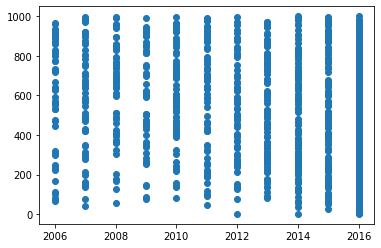

In [74]:
plt.scatter(x, y)

# selecting top 10 director by the value_counts

In [82]:
x = df['director'].value_counts()[:10]
x

Ridley Scott          8
Michael Bay           6
David Yates           6
Paul W.S. Anderson    6
M. Night Shyamalan    6
Christopher Nolan     5
Justin Lin            5
Martin Scorsese       5
David Fincher         5
Zack Snyder           5
Name: director, dtype: int64

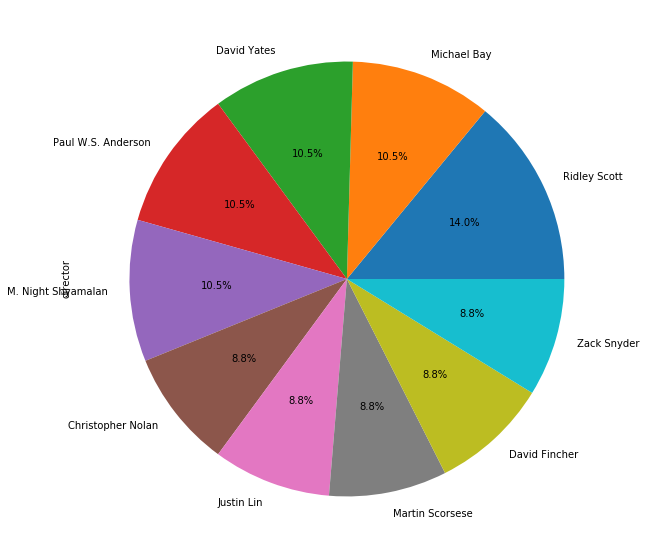

In [92]:
x.plot.pie(autopct='%0.1f%%', figsize = (10, 10))

# selecting top 10 actors 

In [95]:
x = df['actors'].value_counts()[:10]

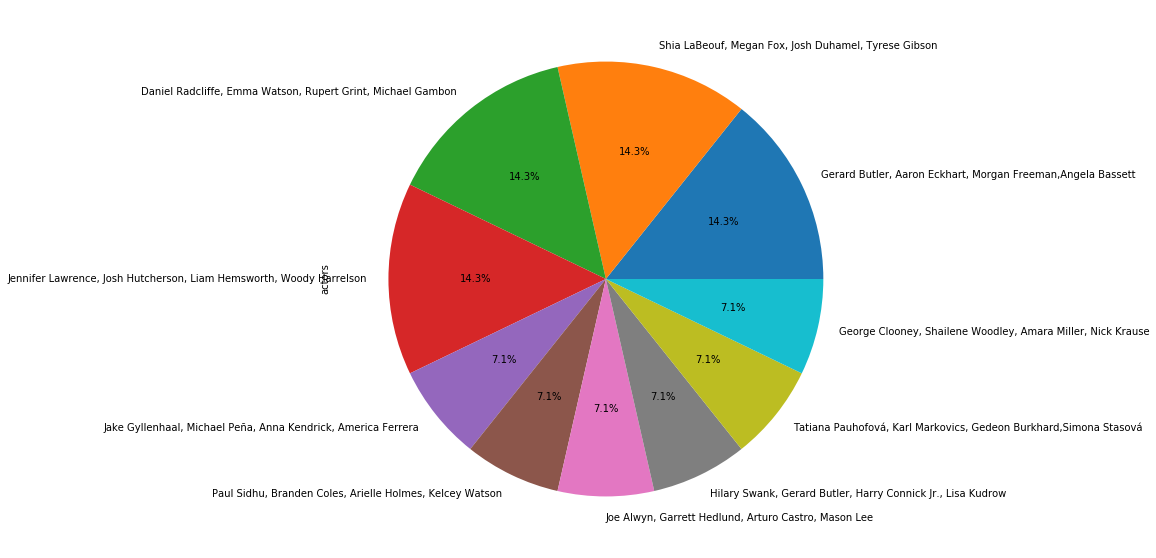

In [97]:
x.plot.pie(autopct='%1.1f%%', figsize = (10,10))

In [132]:
sort_revenue = df23.sort_values(['rating'], ascending=False)

In [133]:
sort_revenue.head(10)

,rank,title,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
133,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
